# Text Clustering 

This section performs text clustering over the reviews of the Sumsung phones.

# Roadmap

1. Vectorization using TF-IDF.


2. PCA dimensionality reduction.


3. Elbow Method to get the optimal number of clusters.


4. Kmeans Clustering.


5. Clusters visualizations.

# Import the Libraries

In [15]:
import pandas as pd
import re
import string
import numpy as np
from collections import Counter

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from yellowbrick.cluster import KElbowVisualizer


# SKlearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

# Load preprocessed data

In [3]:
reviews = pd.read_csv('PreprocessedSumsungReviews.csv')
reviews = reviews.iloc[: , 1:]
reviews = reviews.dropna()
reviews.head()

,Reviews
0,best phone ever
1,great product
2,got seems nice phone
3,awesome
4,nice phone


# Using TF-IDF (Text Representation Technique) to convert the words in the reviews  into numeric representations. 

In [4]:
Reviews = reviews['Reviews']
tf = TfidfVectorizer()                #Create an instance of our TfidfVectorize()        
X_tfidf= tf.fit_transform(Reviews).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Dimensionality reduction using PCA

In [5]:
COMPRESSED_SIZE = 20
pca_model = PCA(COMPRESSED_SIZE)
PC = pca_model.fit_transform(X_tfidf)

# Building Clusters

# Finding the best number of clusters using Elbow method

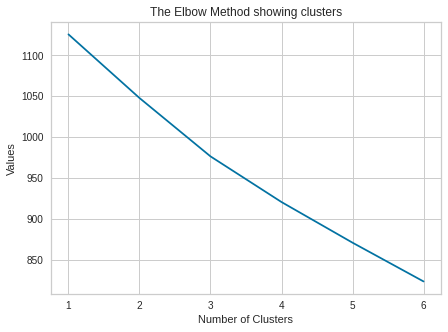

In [9]:
Values = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k,max_iter=1000)
    kmeanModel.fit(PC)
    Values.append(kmeanModel.inertia_)
    
plt.figure(figsize=(7,5))
plt.plot(K, Values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Values')
plt.title('The Elbow Method showing clusters')
plt.show()

/home/melhazzouri/anaconda3/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/melhazzouri/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


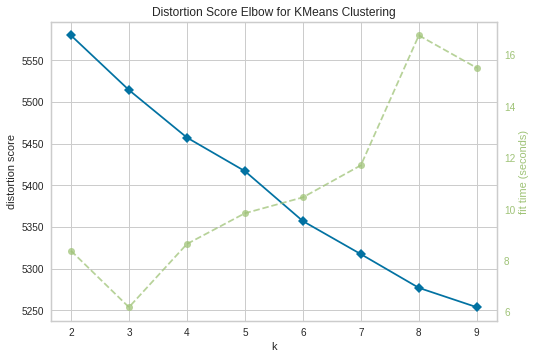

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model_km = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_km, k=(2, 10))
visualizer.fit(X_tfidf)
visualizer.show()

# Compute KMeans clustering

In [11]:
km =KMeans(n_clusters=5, max_iter=1000,random_state=101)
cluster = km.fit_predict(PC)
center = km.cluster_centers_
print(center)

[[ 8.78145252e-02  5.58142525e-01  2.99668159e-02  2.04976049e-02
  -3.29090032e-02 -1.76875903e-02  1.78419592e-02 -2.03465067e-03
  -5.62115607e-04  7.45521718e-03  4.44638060e-02 -1.35342656e-02
   2.95614760e-03 -3.05053648e-03 -1.99066443e-04  1.53338190e-02
   8.96650982e-04  1.59171318e-02  1.72727248e-02  5.64361050e-03]
 [ 5.95683008e-01 -1.04915812e-01  3.87424029e-02  6.84867945e-02
   1.22487175e-01  1.00351723e-01 -5.48257057e-02 -3.88301553e-03
  -4.91858744e-03 -6.31510577e-03  6.87936848e-03 -1.38771520e-02
   3.70015748e-02 -2.84172740e-02  2.84655061e-02  6.37760172e-03
  -3.95556496e-03  1.34194166e-02  2.38936913e-02  1.33508439e-02]
 [ 1.06801655e-02 -1.65810347e-02 -8.20837031e-02 -8.62921315e-02
   1.79879528e-03 -3.47505980e-02  1.25023945e-02 -7.95752478e-03
   2.26644718e-02 -3.75706402e-02  3.57736725e-02 -2.46999489e-02
  -1.39597572e-02 -1.78776508e-02 -2.43460230e-03  9.11306860e-03
  -4.40776626e-03 -8.07072098e-03 -3.32689056e-03 -1.04482643e-03]
 [-9.70

In [12]:
reviews['Cluster'] = cluster
reviews.head()

,Reviews,Cluster
0,best phone ever,4
1,great product,1
2,got seems nice phone,4
3,awesome,4
4,nice phone,4


# Clusters visualizations

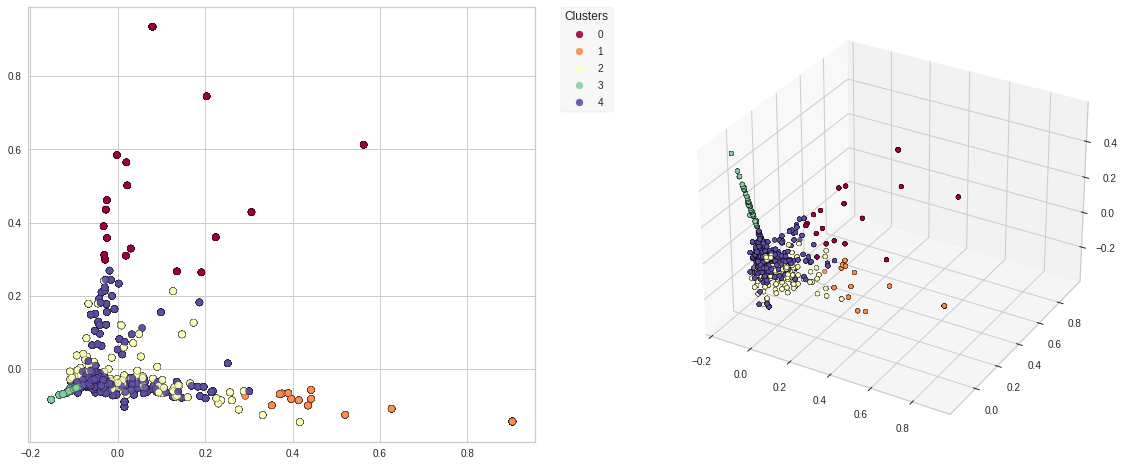

In [51]:
fig = plt.figure(figsize=(20, 8))

# 2D scatter
ax = fig.add_subplot(1, 2, 1)
scatter1 = ax.scatter(x=PC[:,0], y=PC[:,1], c=reviews['Cluster'], cmap='Spectral', edgecolor='black', alpha=0.9)

# Legend
legend = plt.legend(*scatter1.legend_elements(), bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0, title='Clusters', frameon=1, facecolor='whitesmoke')

# 3D scatter
ax = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax.scatter3D(xs=PC[:,0], ys=PC[:,1], zs=PC[:,3], c=reviews['Cluster'], cmap='Spectral', edgecolor='black', alpha=0.7)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


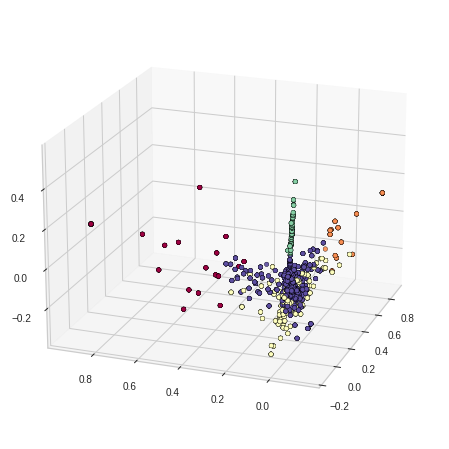

In [57]:
plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
scatter_1= ax.scatter3D(xs=PC[:,0], ys=PC[:,1], zs=PC[:,3], c=reviews['Cluster'], cmap='Spectral', edgecolor='black', alpha=0.7)
ax.legend()
ax.view_init(20, 200)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


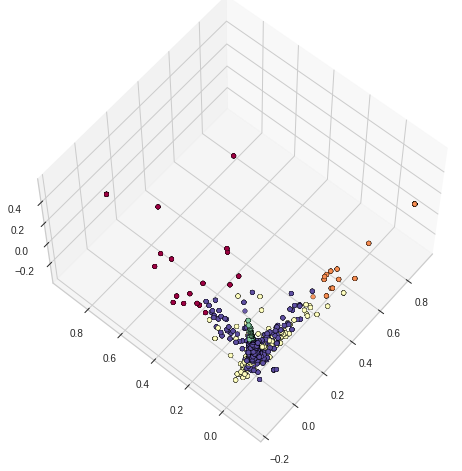

In [61]:
plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
scatter_1= ax.scatter3D(xs=PC[:,0], ys=PC[:,1], zs=PC[:,3], c=reviews['Cluster'], cmap='Spectral', edgecolor='black', alpha=0.7)
ax.legend()
ax.view_init(60, 220)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


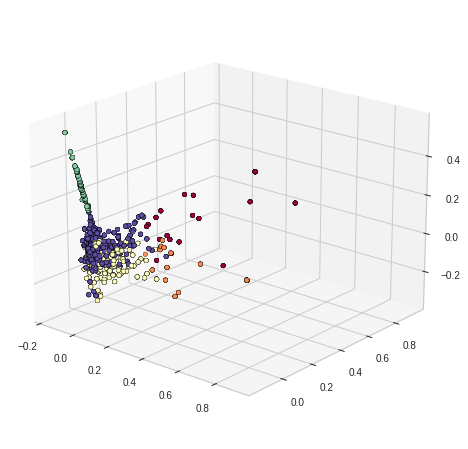

In [71]:
plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
scatter_1= ax.scatter3D(xs=PC[:,0], ys=PC[:,1], zs=PC[:,3], c=reviews['Cluster'], cmap='Spectral', edgecolor='black', alpha=0.7)
ax.legend()
ax.view_init(20, -50)

# Some Visualizations for the clusters

In [16]:
def get_wordcloud(text, color='viridis'):
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', colormap=color)
  # Generate a word cloud
  return wordcloud.generate(text)

# Cluster 0

[('love', 310), ('camera', 80), ('using', 50), ('tripod', 40)]


(-0.5, 399.5, 199.5, -0.5)

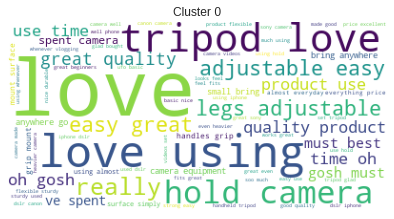

In [17]:
pd.set_option('display.max_colwidth', None)
print(Counter(" ".join(reviews.loc[reviews['Cluster']==0,'Reviews']).split()).most_common(4))


fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
plt.title('Cluster 0')
Reviews = ' '.join(reviews['Reviews'][reviews['Cluster']==0].values)
ax.imshow(get_wordcloud(Reviews))
ax.axis('off')

# Cluster 1

[('product', 196), ('great', 110), ('good', 32), ('versatile', 20)]


(-0.5, 399.5, 199.5, -0.5)

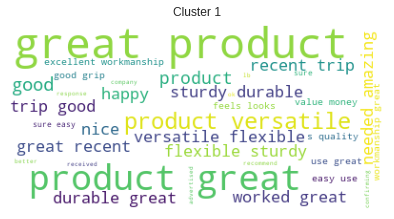

In [18]:
pd.set_option('display.max_colwidth', None)
print(Counter(" ".join(reviews.loc[reviews['Cluster']==1,'Reviews']).split()).most_common(4))

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
plt.title('Cluster 1')
Reviews = ' '.join(reviews['Reviews'][reviews['Cluster']==1].values)
ax.imshow(get_wordcloud(Reviews))
ax.axis('off')

# Cluster 2

[('tripod', 1460), ('use', 820), ('great', 780), ('camera', 620)]


(-0.5, 399.5, 199.5, -0.5)

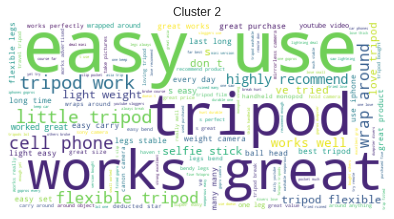

In [19]:
pd.set_option('display.max_colwidth', None)
print(Counter(" ".join(reviews.loc[reviews['Cluster']==2,'Reviews']).split()).most_common(4))

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
plt.title('Cluster 2')
Reviews = ' '.join(reviews['Reviews'][reviews['Cluster']==2].values)
ax.imshow(get_wordcloud(Reviews))
ax.axis('off')

# Cluster 3

[('es', 400), ('el', 383), ('de', 376), ('muy', 354)]


(-0.5, 399.5, 199.5, -0.5)

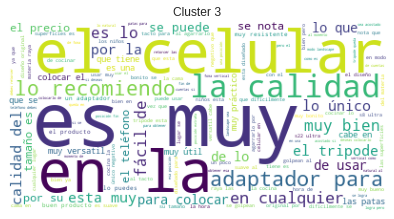

In [20]:
pd.set_option('display.max_colwidth', None)
print(Counter(" ".join(reviews.loc[reviews['Cluster']==3,'Reviews']).split()).most_common(4))

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
plt.title('Cluster 3')
Reviews = ' '.join(reviews['Reviews'][reviews['Cluster']==3].values)
ax.imshow(get_wordcloud(Reviews))
ax.axis('off')

# Cluster 4

[('phone', 1201), ('good', 764), ('camera', 654), ('like', 586)]


(-0.5, 399.5, 199.5, -0.5)

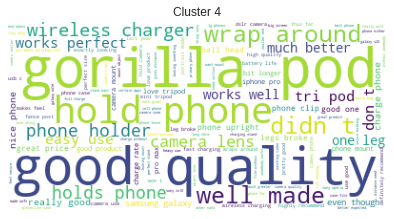

In [21]:
pd.set_option('display.max_colwidth', None)
print(Counter(" ".join(reviews.loc[reviews['Cluster']==4,'Reviews']).split()).most_common(4))

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
plt.title('Cluster 4')
Reviews = ' '.join(reviews['Reviews'][reviews['Cluster']==4].values)
ax.imshow(get_wordcloud(Reviews))
ax.axis('off')

Top terms per cluster:

Cluster 0: Love camera using tripod.

Cluster 1: Great product good versatile.

Cluster 2: Great use camera tripod.

Cluster 3: Non English reviews.

Cluster 4: Good phone like camera.

Overall, Sumsung phones have good reviews, Sumsung buyers are in general happy about the 
quality of camera with tripods. 